In [12]:
!pip install scikit-learn


In [13]:
 pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [24]:
#Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Load the dataset
df = pd.read_csv("boks.csv")

#Drop irrelevant columns
df.drop(columns=["title", "book_url", "stock"], inplace=True)

#Convert ratings from text to numbers
rating_map = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}
df["rating"] = df["rating"].map(rating_map)

# Create binary rating target: 1 if rating >= 4, else 0
df["rating_binary"] = df["rating"].apply(lambda x: 1 if x >= 4 else 0)

#Encode the 'category' column
le = LabelEncoder()
df["category"] = le.fit_transform(df["category"])

# Check for missing values
#print("Missing values in each column:")
#print(df.isnull().sum())

#Display the entire cleaned dataset (all rows)
pd.set_option('display.max_rows', None)
print(df)


     price  rating  category  rating_binary
0    51.77       3        33              0
1    53.74       1        21              0
2    50.10       1        17              0
3    47.82       4        26              1
4    54.23       5        22              1
5    22.65       1        49              0
6    33.34       4         6              1
7    17.93       3        14              0
8    22.60       4        14              1
9    52.15       1        33              0
10   13.99       2        14              0
11   20.66       4        33              1
12   17.46       5        49              1
13   52.29       5        41              1
14   35.02       5        25              1
15   57.25       3        25              0
16   23.88       1        33              0
17   37.59       1        39              0
18   51.33       2        34              0
19   45.17       2        47              0
20   12.84       1        46              0
21   37.32       2        25    

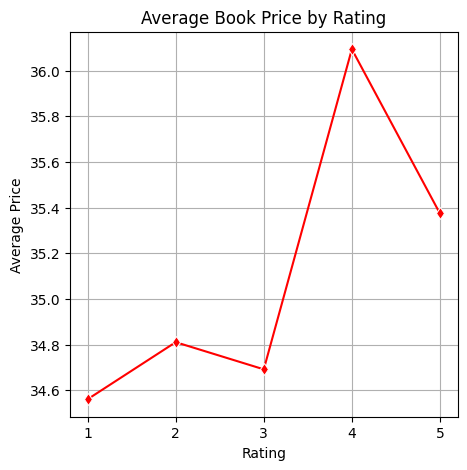

In [16]:
avg_price_by_rating = df.groupby('rating')['price'].mean().reset_index()

#Plot line graph
plt.figure(figsize=(5, 5))
sns.lineplot(data=avg_price_by_rating, x='rating', y='price', marker='d', color='red')

plt.title("Average Book Price by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Price")
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.show()

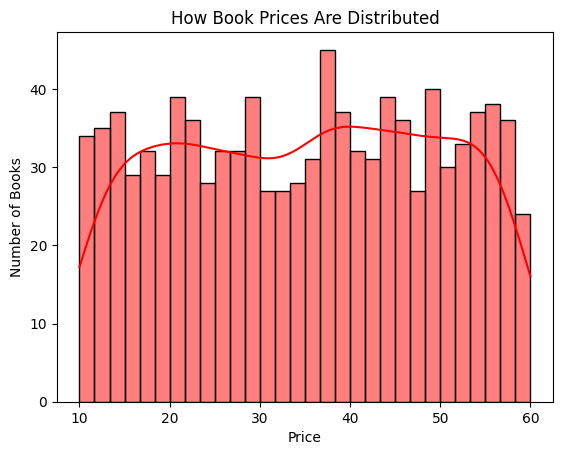

In [17]:
#Shows how book prices are spread out.
#Height of each bar tells you how many books fall into each price range.
#It helps us see if most books are cheap, expensive, or somewhere in between.

sns.histplot(df['price'], bins=30, kde=True, color='red')
plt.title("How Book Prices Are Distributed")
plt.xlabel("Price")
plt.ylabel("Number of Books")
plt.show()


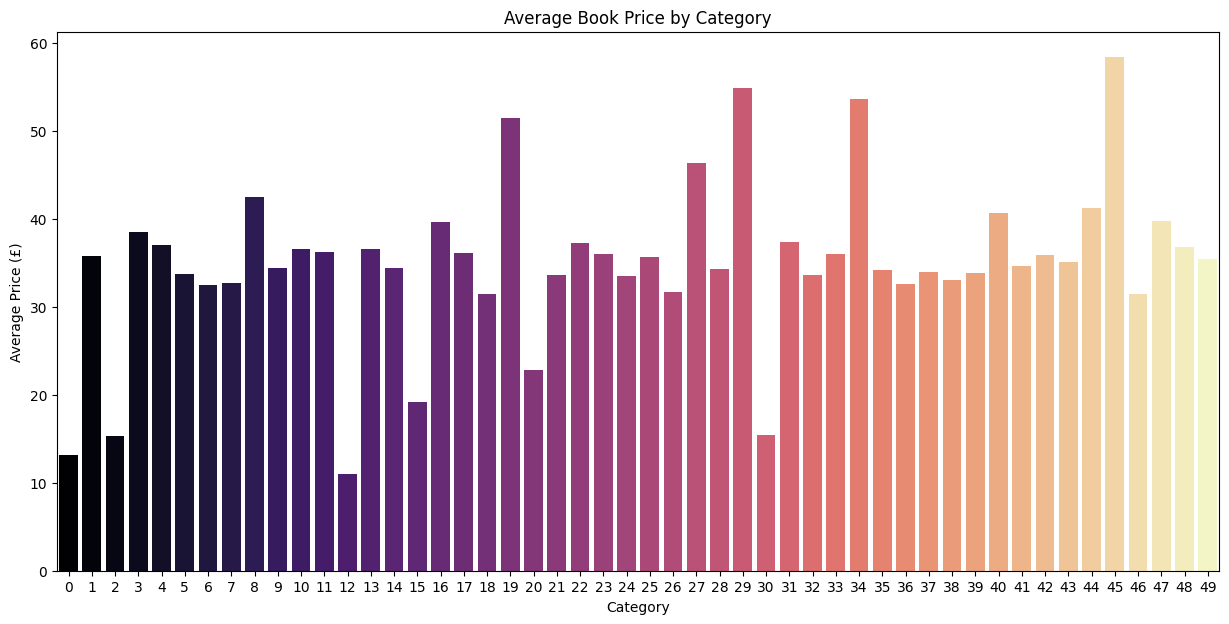

In [18]:
# Calculate mean price per category
mean_price_by_category = df.groupby('category')['price'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.barplot(x='category', y='price', data=mean_price_by_category, hue='category', palette='magma', legend=False)

plt.title("Average Book Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price (£)")
plt.show()

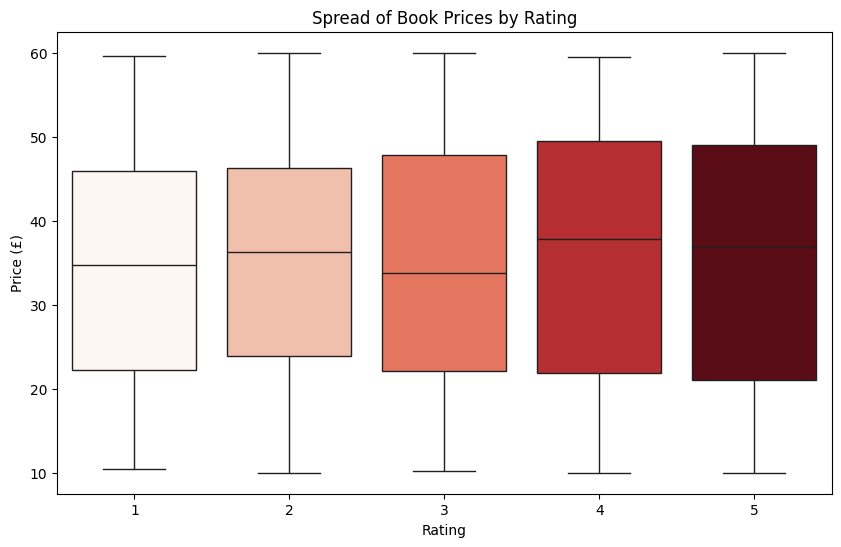

In [19]:
plt.figure(figsize=(10, 6))

#Box plot of prices by rating
sns.boxplot(x='rating', y='price', data=df, hue='rating', palette='Reds', legend=False)

plt.title("Spread of Book Prices by Rating")
plt.xlabel("Rating")
plt.ylabel("Price (£)")
plt.show()

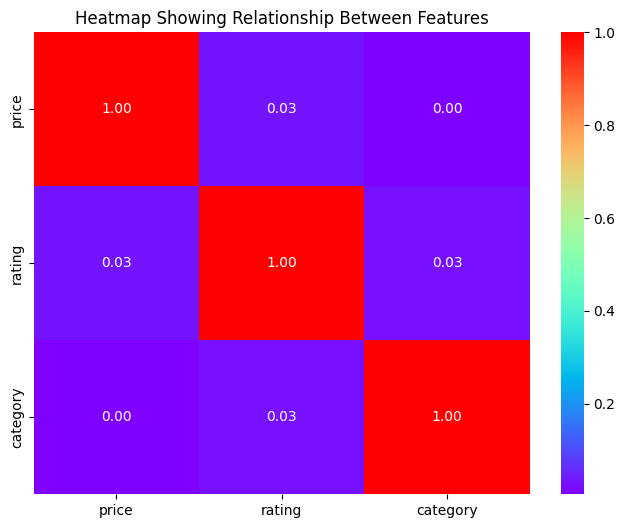

In [20]:
#Calculate correlation between numerical columns
corr = df[['price', 'rating', 'category']].corr()

#Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='rainbow', fmt=".2f")

plt.title("Heatmap Showing Relationship Between Features")
plt.show()

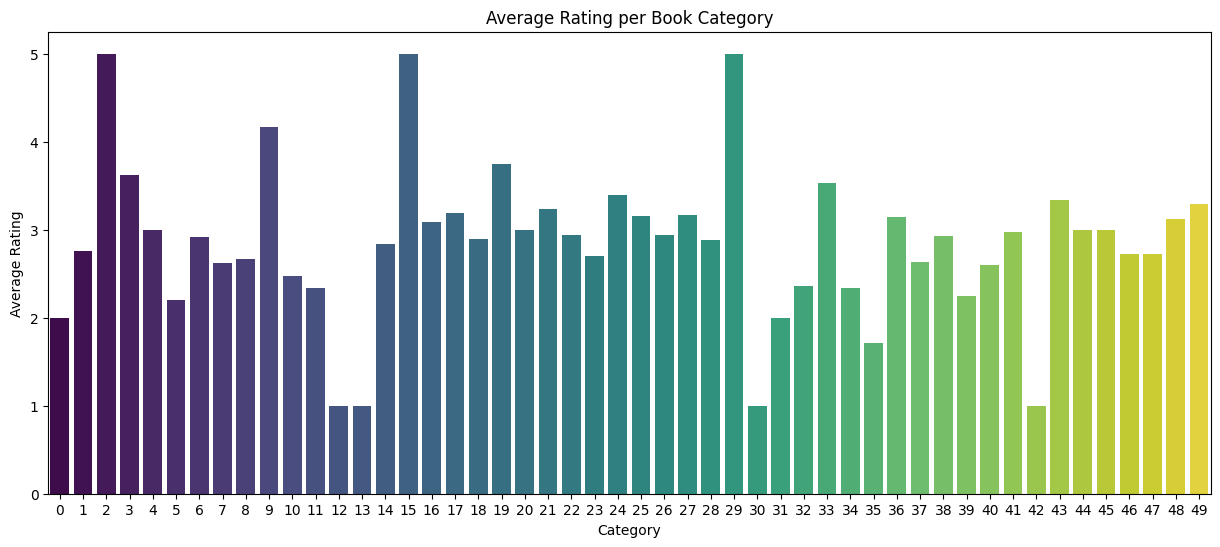

In [21]:
#Calculate mean rating for each category
avg_rating_by_category = df.groupby('category')['rating'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(x='category', y='rating', data=avg_rating_by_category, hue='category', palette='viridis', legend=False)

plt.title("Average Rating per Book Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()

In [29]:
X = df[["price", "category"]]
y = df["rating_binary"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision_0 = precision_score(y_test, y_pred, pos_label=0)
precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_0 = f1_score(y_test, y_pred, pos_label=0)
f1_1 = f1_score(y_test, y_pred, pos_label=1)
cm = confusion_matrix(y_test, y_pred)

# Print simpler results
print("\nBinary Classification Results (Good vs Not Good):\n")
print(f"Accuracy: {accuracy:.2f}\n")

print("Class 0 (Not Good):")
print(f"  Precision: {precision_0:.2f}")
print(f"  Recall:    {recall_0:.2f}")
print(f"  F1-score:  {f1_0:.2f}\n")

print("Class 1 (Good):")
print(f"  Precision: {precision_1:.2f}")
print(f"  Recall:    {recall_1:.2f}")
print(f"  F1-score:  {f1_1:.2f}\n")

print("Confusion Matrix:")
print(cm)



Binary Classification Results (Good vs Not Good):

Accuracy: 0.56

Class 0 (Not Good):
  Precision: 0.62
  Recall:    0.70
  F1-score:  0.66

Class 1 (Good):
  Precision: 0.44
  Recall:    0.35
  F1-score:  0.39

Confusion Matrix:
[[84 36]
 [52 28]]
